This document is part of my [Python visualization library comparison](http://www.terran.us/articles/python_visualization.html)

# Setup and Notes

In [1]:
import pandas as pd
import numpy as np

# Most examples import * from plotnine, but I have explicitly qualified everything with p9
# for clarity about what is in the module.
import plotnine as p9
from plotnine.data import diamonds

# Use this for explicit access to breaks, transformations, etc:
#from mizani.breaks import minor_breaks
#from mizani.transforms import identity_trans
%matplotlib inline

https://github.com/has2k1/plotnine/blob/master/doc/about-plotnine.rst Package overview  
https://plotnine.readthedocs.io/en/stable/tutorials.html Random facts, not a coherent intro  
https://media.readthedocs.org/pdf/plotnine/latest/plotnine.pdf reference docs  

There is no proper introduction for plotnine, but since it follows the ggplot syntax exactly, you can read either the ggplot book or the chapters on "data visualization" and "exploratory data analysis" at http://r4ds.had.co.nz

# Two Continuous Dimensions

## Basic Scatter Plot

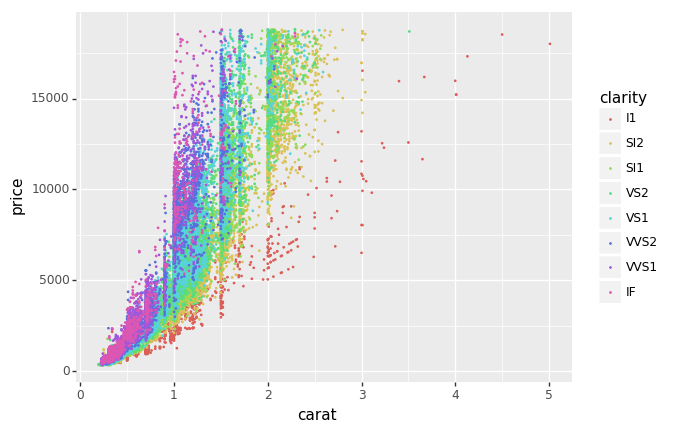

<ggplot: (-9223363266340219076)>

In [2]:
p9.ggplot(diamonds,p9.aes(x='carat',y='price',color='clarity')) + p9.geom_point(size=0.1)

In the R version, the colors are all the same darkness, so they're perceptually uniform - that's not the case here; you can see the yellow is visibly lighter than the others, which is not desirable.  It also took 3x as long to draw.

There are some other differences in appearance just because the order in which the colors are plotted is reversed, changing which one is on top, but this is arbitrary so neither can be said to be better.

Overall I'd consider this result acceptable.

## Faceted Scatterplot

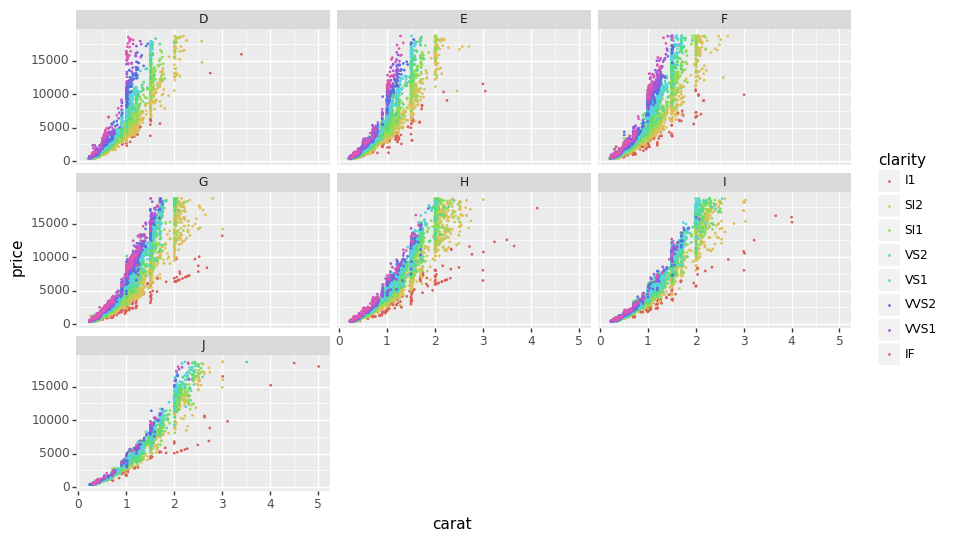

<ggplot: (-9223363266360508521)>

In [3]:
p9.ggplot(diamonds,p9.aes(x='carat',y='price',color='clarity')) + p9.geom_point(size=0.1) + \
    p9.facet_wrap('~color') + p9.theme(figure_size=(10,6))

## Basic Line Graph

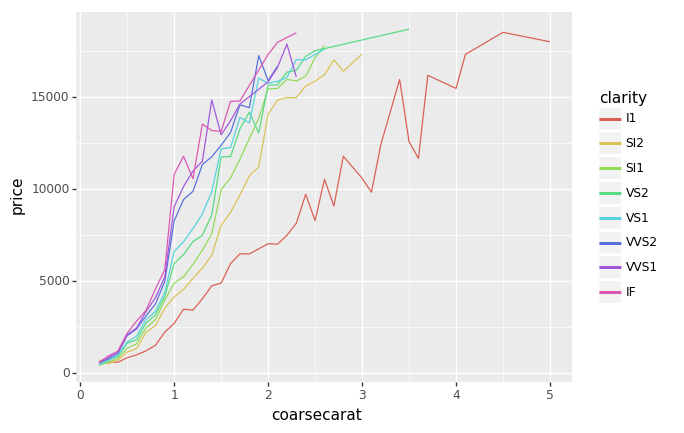

<ggplot: (8770492147397)>

In [4]:
# Note that ggplot doesn't appear to see columns in the index, so I have to take them back out
# with reset_index prior to making the graph:
d=diamonds
d['coarsecarat']=d['carat'].round(1)
d=d.groupby(['coarsecarat','clarity']).aggregate({'price':np.mean}).reset_index()
p9.ggplot(d,p9.aes(x='coarsecarat',y='price',color='clarity')) + p9.geom_line()

## Log Scale

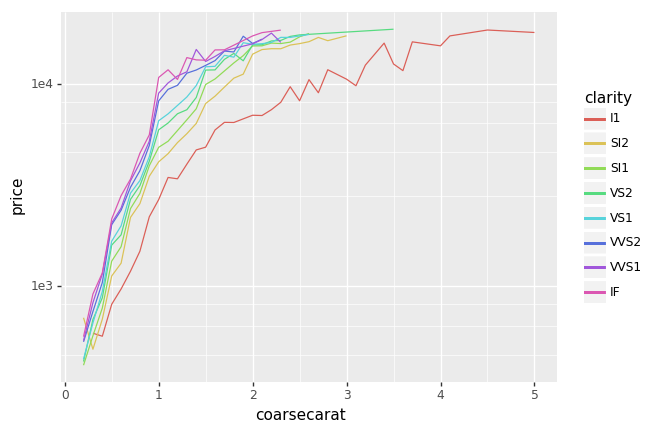

<ggplot: (-9223363266275460927)>

In [5]:
p9.ggplot(d,p9.aes(x='coarsecarat',y='price',color='clarity')) + p9.geom_line() + p9.scale_y_log10()

## Heatmap

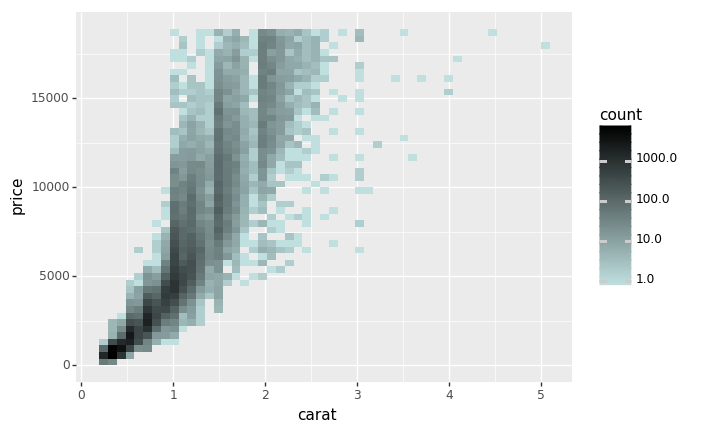

<ggplot: (8770492151679)>

In [6]:
p9.ggplot(diamonds, p9.aes(x='carat',y='price')) + p9.geom_bin2d(bins=50) + \
  p9.scale_fill_gradient(trans='log10',low='#c0e0e0', high='#000000')

# One Continuous Dimension

## Histogram

/home/terran/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/plotnine/layer.py:363: UserWarning: stat_bin : Removed 14 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/home/terran/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/plotnine/layer.py:452: UserWarning: geom_histogram : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


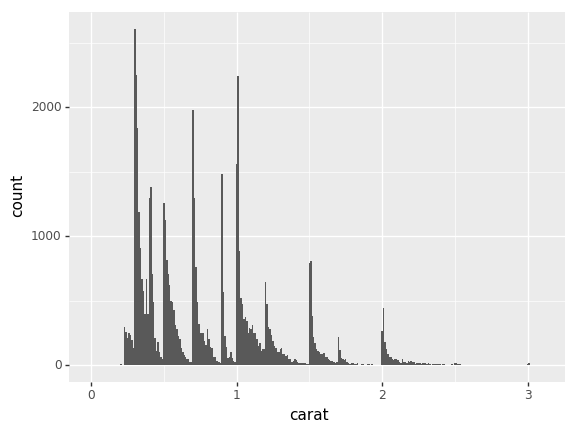

<ggplot: (-9223363266346652784)>

In [14]:
# I don't care about the warnings that some of the data was cut off; I did that on purpose.
# There must be a way to suppress the warnings, right?
p9.ggplot(p9.aes(x='carat'),data=diamonds) + p9.geom_histogram(binwidth=0.01) + p9.xlim(0,3.1)

# Two Discrete Dimensions

## Side-by-Side Bar Chart

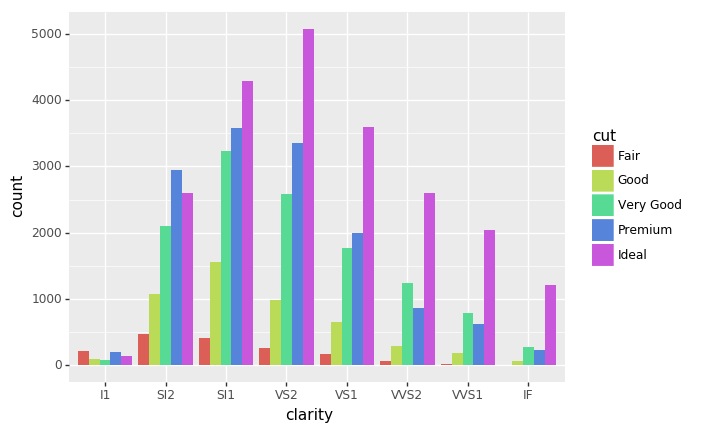

<ggplot: (8770514709694)>

In [8]:
p9.ggplot(diamonds, p9.aes(x='clarity', fill='cut')) + p9.geom_bar(position='dodge')

## Stacked Bar Chart

Stacked is actually the default in ggplot, so this is simpler than the previous one.

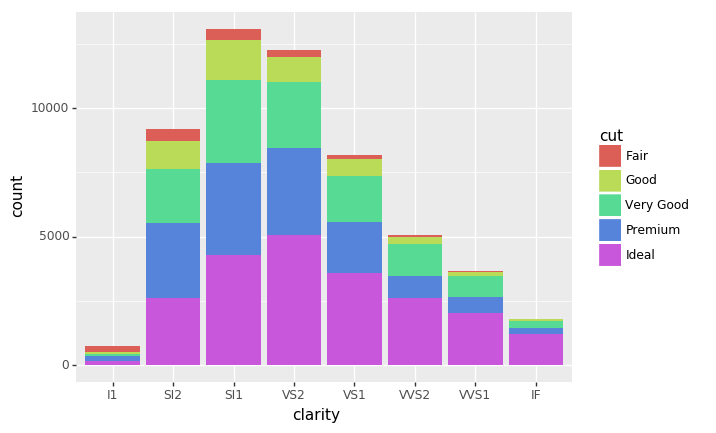

<ggplot: (-9223363266346630817)>

In [9]:
p9.ggplot(diamonds, p9.aes(x='clarity',fill='cut')) + p9.geom_bar()

# One Discrete, One Continuous

## Boxplot

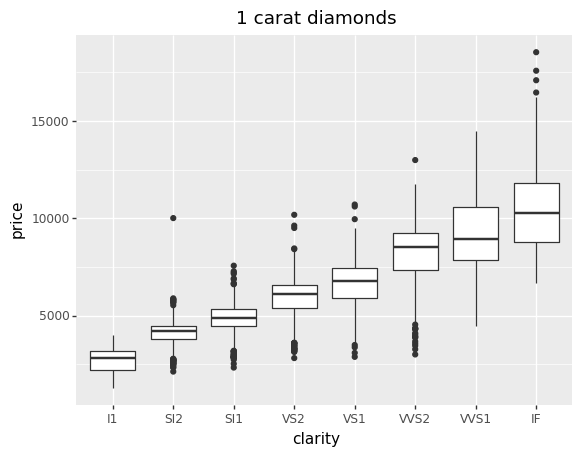

<ggplot: (8770514629794)>

In [10]:
d=diamonds.query('carat >= 0.95 & carat <= 1.05')
p9.ggplot(d, p9.aes(x='clarity',y='price')) + p9.geom_boxplot() + p9.ggtitle('1 carat diamonds')

## Violin Plot

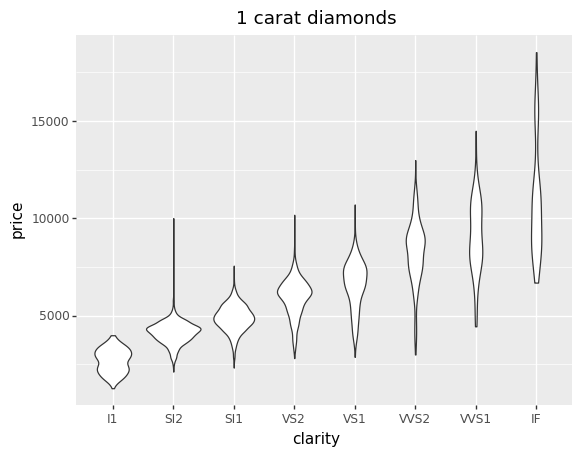

<ggplot: (-9223363266346614044)>

In [11]:
p9.ggplot(d, p9.aes(x='clarity',y='price')) + p9.geom_violin() + p9.ggtitle('1 carat diamonds')

## Faceted Histogram

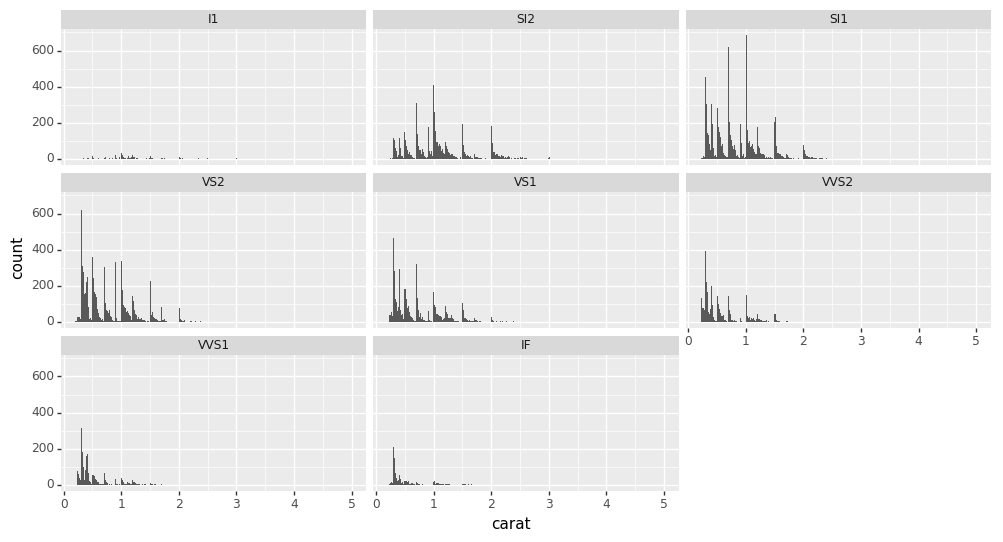

<ggplot: (8770508123056)>

In [12]:
p9.ggplot(diamonds, p9.aes(x='carat')) + p9.facet_wrap('~clarity') + p9.geom_histogram(binwidth=0.01) + \
p9.theme(figure_size=(12,6))

# More Than Two Variables

## Pair Plot (FAIL)

Base ggplot can't do this!  In R, there's a great add-on library which provides ggpairs(), but it's not ported.